# Moerser Daten: Vornamen 

* 2009: [https://www.offenesdatenportal.de/dataset/33cdd3f6-52bf-41c3-b03f-30e19631f66a/resource/9b0920c9-d593-4abc-88b2-5b1bb1a63ce2/download/vornamen2009.csv]
* 2010: [https://www.offenesdatenportal.de/dataset/4e1cd32f-5788-40d1-834b-284fdf89371b/resource/f0c646ad-c4c8-4aff-9276-f12f0d6ad78c/download/vornamen2010.csv]
* 2011: [https://www.offenesdatenportal.de/dataset/185165d7-a35a-484a-8401-9e4a1ab6033d/resource/888edbfd-605c-461f-961c-72be4d281a00/download/vornamen2011.csv]
* 2012: [https://www.offenesdatenportal.de/dataset/e09b6922-8873-4930-851a-eb6634be50db/resource/00a00f02-3ede-4512-b4b2-d076f7a2cf67/download/vornamen2012.csv]
* 2013: [https://www.offenesdatenportal.de/dataset/45c78ab3-fd45-4dbc-bda5-2dddc6b71ca3/resource/6e1aabc2-0490-4605-8667-0a8b8a28702a/download/vornamen2013.csv]
* 2014: [https://www.offenesdatenportal.de/dataset/e5ff322f-a8b7-4dc7-b281-2d3d767983f9/resource/4da3d423-9aeb-4e6e-8dbc-926649089416/download/vornamen14.csv]


Zu den Daten: 
* 2014 = andere Sortierung: Nur vorname;anzahl;geschlecht - so wie in Köln 
* Daten davor: Rang;Mädchen;Anzahl;Knaben;Anzahl = verschachtelte Datenstruktur, 'schlauere Tabelle', als Pressemitteilung zum abdrucken besser, aber weniger gut für Maschinenlesbarkeit: Da gilt: Bitte alles und bitte möglichst 'dumm' = so einfach wie möglich 
* Dazu Problem ä = Umlaut - Iso encodiert
* 2010 dazu Problem, dass hinter jeder Zeile zusätzliche ; sind und außerdem Leerzeichen, die nix zu suchen haben (Vor allem im Kopf ärgerlich) 
* Dazu Zusatzinfo: Wie oft wurden 1,2, mehr als drei Namen vergeben: Wichtig, aber bitte nicht in Daten reinschreiben. 

In [106]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from ggplot import *

In [107]:
f = 'vornamen2013.csv'
df = pd.read_csv(f, sep=';', encoding='ISO-8859-1')
df.head(10)

,Rang,Mädchen,Anzahl,Knaben,Anzahl.1
0,1,Sophie,43,Noah,21
1,2,Marie,40,Ben,19
2,3,Mia,23,Jonas,18
3,4,Maria,19,Leon,18
4,5,Lina,18,Maximilian,16
5,6,Anna,14,Paul,15
6,7,Emily,13,Elias,14
7,8,Emma,13,Finn,13
8,9,Luisa,13,Jan,13
9,10,Sophia,13,Lukas,13


In [108]:
df.columns

Index(['Rang', 'Mädchen', 'Anzahl', 'Knaben', 'Anzahl.1'], dtype='object')

In [109]:
df.columns = ['rang', 'vorname', 'anzahl', 'knaben', 'k_anzahl']

In [110]:
df.head()

,rang,vorname,anzahl,knaben,k_anzahl
0,1,Sophie,43,Noah,21
1,2,Marie,40,Ben,19
2,3,Mia,23,Jonas,18
3,4,Maria,19,Leon,18
4,5,Lina,18,Maximilian,16


In [111]:
# Für Mädchen: Spalte Knaben und Anteil weglassen
# Spalte Geschlecht = w hinzufügen 

# Für Knaben: Spalte Mädchen und Anteil weglassen
# Spalte Geschlecht = w hinzufügen 

# Mädchen und Knaben zusammenführen 

maedchen = df.drop('k_anzahl', axis=1)

In [112]:
maedchen = maedchen.drop('knaben', axis=1)

In [113]:
maedchen.head()

,rang,vorname,anzahl
0,1,Sophie,43
1,2,Marie,40
2,3,Mia,23
3,4,Maria,19
4,5,Lina,18


In [114]:
maedchen['geschlecht'] = 'w'
maedchen.head()

,rang,vorname,anzahl,geschlecht
0,1,Sophie,43,w
1,2,Marie,40,w
2,3,Mia,23,w
3,4,Maria,19,w
4,5,Lina,18,w


In [115]:
maedchen['stadt'] = 'Moers'

In [116]:
maedchen['jahr'] = '2009'

In [117]:
# Knaben 

In [118]:
df.head()

,rang,vorname,anzahl,knaben,k_anzahl
0,1,Sophie,43,Noah,21
1,2,Marie,40,Ben,19
2,3,Mia,23,Jonas,18
3,4,Maria,19,Leon,18
4,5,Lina,18,Maximilian,16


In [119]:
jungs = df.drop(['anzahl', 'vorname'], axis=1)

In [120]:
jungs.columns = ['rang', 'vorname', 'anzahl']

In [121]:
jungs['jahr'] = '2009'

In [122]:
jungs['stadt'] = 'Moers'

In [123]:
jungs['geschlecht'] = 'm'

In [124]:
pieces = [maedchen,jungs]

In [125]:
namen2009 = pd.concat(pieces, ignore_index=True)

In [126]:
namen2009.head(2)

,anzahl,geschlecht,jahr,rang,stadt,vorname
0,43,w,2009,1,Moers,Sophie
1,40,w,2009,2,Moers,Marie


In [127]:
namen2009.to_csv('namen2009.csv', sep=';')

# Function

In [128]:
years = range(2009,2014)

pieces = []
columns = ['rang', 'vorname', 'anzahl', 'knaben', 'k_anzahl']

for year in years:
    path = 'vornamen%d.csv' % year
    frame = pd.read_csv(path, names=columns, sep=';', encoding='ISO-8859-1', skiprows=1)
    frame['jahr'] = year
    pieces.append(frame)
    
# Concatenate in one single DF
names = pd.concat(pieces, ignore_index=True)

In [129]:
names.tail()

,rang,vorname,anzahl,knaben,k_anzahl,jahr
145,26,Elif,6,Liam,8,2013
146,27,Fabienne,6,Luis,8,2013
147,28,Lotta,6,Nico,8,2013
148,29,Olivia,6,Tim,8,2013
149,30,Sara,6,Ali,7,2013


In [130]:
maedchen = names[['rang', 'vorname', 'anzahl', 'jahr']]

In [131]:
maedchen['geschlecht'] = 'w'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [132]:
maedchen.head(1)

,rang,vorname,anzahl,jahr,geschlecht
0,1,Sophie,37,2009,w


In [133]:
jungs = names[['rang', 'knaben', 'k_anzahl', 'jahr']]

In [134]:
jungs.head(1)

,rang,knaben,k_anzahl,jahr
0,1,Maximilian,21,2009


In [135]:
jungs.columns = ['rang', 'vorname', 'anzahl', 'jahr']

In [136]:
jungs['geschlecht'] = 'm'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [137]:
jungs.head(1)

,rang,vorname,anzahl,jahr,geschlecht
0,1,Maximilian,21,2009,m


In [138]:
g = 'https://www.offenesdatenportal.de/dataset/e5ff322f-a8b7-4dc7-b281-2d3d767983f9/resource/4da3d423-9aeb-4e6e-8dbc-926649089416/download/vornamen14.csv'
df = pd.read_csv(g, sep=';')
df.head(2)

,vorname,anzahl,geschlecht
0,Marie,35,w
1,Alexander,32,m


In [139]:
df['jahr'] = 2014 

In [140]:
# Top 30 der weiblichen Vornamen
w_top30 = df[(df['geschlecht'] == 'w')].head(30)
w_top30.head(6)

,vorname,anzahl,geschlecht,jahr
0,Marie,35,w,2014
2,Sophie,30,w,2014
3,Emilia,27,w,2014
4,Mia,25,w,2014
9,Emma,22,w,2014
11,Lena,18,w,2014


In [141]:
w_top30['rang'] = w_top30['anzahl'].rank(ascending=False, method='first')
w_top30.head(2)

,vorname,anzahl,geschlecht,jahr,rang
0,Marie,35,w,2014,1.0
2,Sophie,30,w,2014,2.0


In [142]:
# Top 30 der männlichen Vornamen
m_top30 = df[(df['geschlecht'] == 'm')].head(30)
m_top30.head(2)

,vorname,anzahl,geschlecht,jahr
1,Alexander,32,m,2014
5,Elias,23,m,2014


In [143]:
m_top30['rang'] = m_top30['anzahl'].rank(ascending=False, method='first')
m_top30.head(2)

,vorname,anzahl,geschlecht,jahr,rang
1,Alexander,32,m,2014,1.0
5,Elias,23,m,2014,2.0


In [144]:
m_top30.dtypes

vorname        object
anzahl          int64
geschlecht     object
jahr            int64
rang          float64
dtype: object

In [145]:
m_top30['rang'] = m_top30['rang'].astype(int)

In [146]:
m_top30.head(1)

,vorname,anzahl,geschlecht,jahr,rang
1,Alexander,32,m,2014,1


In [147]:
w_top30['rang'] = w_top30['rang'].astype(int)

In [148]:
w_top30.head(1)

,vorname,anzahl,geschlecht,jahr,rang
0,Marie,35,w,2014,1


In [150]:
geschlechter = [maedchen, jungs, w_top30, m_top30]


In [153]:
len(maedchen)

150

In [155]:
names = pd.concat(geschlechter, ignore_index=True)

In [156]:
names.tail()

,anzahl,geschlecht,jahr,rang,vorname
355,8,m,2014,26,Noel
356,7,m,2014,27,Ali
357,7,m,2014,28,Anton
358,7,m,2014,29,Johannes
359,7,m,2014,30,Liam


In [157]:
len(names)

360

In [158]:
names.to_csv('names.csv')

In [36]:
sophie = names[names['vorname']== 'Sophie']

In [37]:
sophie

,rang,vorname,anzahl,jahr
0,1,Sophie,37,2009
31,2,Sophie,35,2010
60,1,Sophie,49,2011
91,2,Sophie,30,2012
120,1,Sophie,43,2013


In [43]:
output_notebook()

Loading BokehJS ...

In [44]:
from bokeh.plotting import figure, output_file, show

# prepare some data
y = sophie['anzahl']
x = sophie['jahr']

# output to static HTML file
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

Loading BokehJS ...

In [55]:
laura = names[names['vorname']== 'Laura']

In [56]:
laura

,rang,vorname,anzahl,jahr
15,16,Laura,9,2009
46,17,Laura,9,2010
66,7,Laura,13,2011
103,14,Laura,10,2012
142,23,Laura,7,2013


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


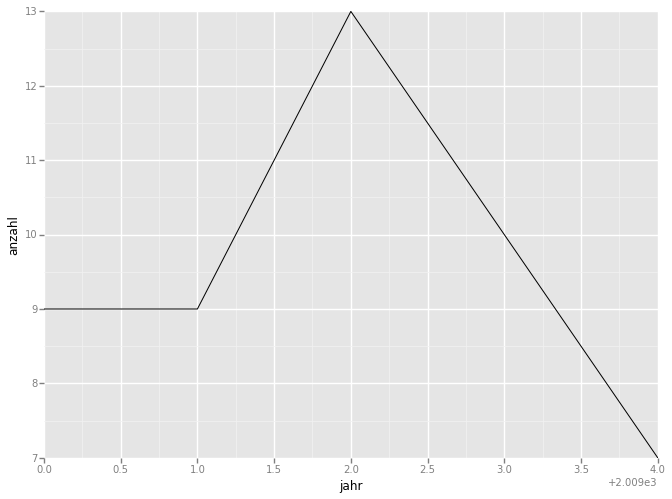

<ggplot: (-895072056)>

In [61]:
p = ggplot(aes(x='jahr', y='anzahl'), data=laura)
p + geom_line()

In [24]:
maedchen.append(jungs, ignore_index=True)

,anzahl,jahr,k_anzahl,knaben,rang,vorname
0,37.0,2009,NaN,NaN,1,Sophie
1,25.0,2009,NaN,NaN,2,Marie
2,15.0,2009,NaN,NaN,3,Mia
3,14.0,2009,NaN,NaN,4,Anna
4,14.0,2009,NaN,NaN,5,Emilia
5,11.0,2009,NaN,NaN,6,Johanna
6,11.0,2009,NaN,NaN,7,Katharina
7,11.0,2009,NaN,NaN,8,Lea
8,11.0,2009,NaN,NaN,9,Leonie
9,10.0,2009,NaN,NaN,10,Hannah


In [21]:
names

,rang,vorname,anzahl,knaben,k_anzahl,jahr
0,1,Sophie,37,Maximilian,21,2009
1,2,Marie,25,Noah,21,2009
2,3,Mia,15,Luca,20,2009
3,4,Anna,14,Leon,18,2009
4,5,Emilia,14,Ben,16,2009
5,6,Johanna,11,Jan,15,2009
6,7,Katharina,11,Alexander,14,2009
7,8,Lea,11,Elias,14,2009
8,9,Leonie,11,Jonas,14,2009
9,10,Hannah,10,Jason,13,2009


In [61]:
## Prozente berechnen
summe_moers_maedchen_top_30 = maedchen['anzahl'].sum()
summe_moers_maedchen_top_30

318

In [62]:
def anteil_an_top_30(anzahl, summe):
    # returns the difference between post and pre
    return anzahl / summe 

In [64]:
maedchen['prozent'] = anteil_an_top_30(maedchen['anzahl'], summe_moers_maedchen_top_30)

In [65]:
maedchen

,rang,vorname,anzahl,geschlecht,stadt,jahr,prozent
0,1,Sophie,37,w,Moers,2009,0.116352
1,2,Marie,25,w,Moers,2009,0.078616
2,3,Mia,15,w,Moers,2009,0.047170
3,4,Anna,14,w,Moers,2009,0.044025
4,5,Emilia,14,w,Moers,2009,0.044025
5,6,Johanna,11,w,Moers,2009,0.034591
6,7,Katharina,11,w,Moers,2009,0.034591
7,8,Lea,11,w,Moers,2009,0.034591
8,9,Leonie,11,w,Moers,2009,0.034591
9,10,Hannah,10,w,Moers,2009,0.031447


In [2]:
data = {'name': ['Max', 'Sophie', 'Lisa'],
        'geschlecht': ['m', 'w', 'w'],
        'jahr': ['2009','2009','2009'],
        'a_2009': [35, 22, 17],
        'r_2009': [1, 2, 3],        
        'a_2010': [32,29,15], 
        'rang_2010': [1, 2, 3], 
        'anzahl_2013': [30,32,5],
        'rang_2010': [2, 1, 3], 
       }
test = pd.DataFrame(data, index=data['name'])
test

,a_2009,a_2010,anzahl_2013,geschlecht,jahr,name,r_2009,rang_2010
Max,35,32,30,m,2009,Max,1,2
Sophie,22,29,32,w,2009,Sophie,2,1
Lisa,17,15,5,w,2009,Lisa,3,3


In [ ]:
data2 = {'vorname': ['Max', 'Sophie', 'Lisa', 'Max', 'Sophie', 'Lisa'],
        'geschlecht': ['m', 'w', 'w', 'm', 'w', 'w'],
         'jahr': ['2009','2009','2009', '2010', '2010', '2010'],
         'anzahl': [34, 32, 21, 32, 36, 5], 
         'rang' : [1, 2, 3, 2, 1, 3]
       }
test2 = pd.DataFrame(data2)
test2

In [ ]:
test2.dtypes

In [ ]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

test2.jahr = [datetime.strptime(x, '%Y') for x in test2.jahr]

In [ ]:
test2.dtypes

In [ ]:
import datetime as dt
test2['jahr'] = test2.jahr.apply(lambda x: dt.datetime.strftime(x,'%Y'))

In [ ]:
test2

In [ ]:
t = test2[test2.vorname == 'Max']
x = t['anzahl']
y = t['jahr']
x

In [ ]:
g = 'vornamen14.csv'
namen = pd.read_csv(g, sep=';')
len(namen)

In [ ]:
def jahr_dazu(): 
    for i in namen['vorname']:
        print('2014')
        

In [ ]:
jahr = jahr_dazu()
namen = namen.append({'jahr': jahr}, ignore_index=True)

In [ ]:
namen.sort_values(by='age').tail()